In [1]:
#Importing warning library to avoid any warnings
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
import pandas as pd
train=pd.read_csv('bigdatamart_Train.csv')
test=pd.read_csv('bigdatamart_Test.csv')

In [3]:
#Train data
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#Test data
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


As there are 2 separate datasets, we can combine them together into a single dataset so that it will be easier to analyze and proceed further. We can combine them using concat operation

In [5]:
#Combining the 2 datasets
train['source']='train'   #For identifying train data
test['source']='test'     #For identifying test data
test['Item_Outlet_Sales']= 0   #As we don't know the Item outlet sales in test, we are assuming as 0
df=pd.concat([test,train],ignore_index=True)   #Combining using concat
print(train.shape,test.shape,df.shape)    #Checking out the dimensions separately and after combining

(8523, 13) (5681, 13) (14204, 13)


After combining we can see that there are 14204 rows and 13 columns in the dataset

In [6]:
df    #Checking out the combined dataset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source,Item_Outlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test,0.0000
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,test,0.0000
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,test,0.0000
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,test,0.0000
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,test,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,train,2778.3834
14200,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,train,549.2850
14201,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,train,1193.1136
14202,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,train,1845.5976


In [7]:
df.columns   #Total columns present

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'source', 'Item_Outlet_Sales'],
      dtype='object')

# Dataset Description

-> The data scientists at BigMart have collected the year 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined.

-> The attributes are:

1.Item_Identifier - Unique Item ID

2.Item_Weight - Weight of the item

3.Item_Fat_Content - Kind of fat content present in the item

4.Item_Visibility - The % of total display area of all item in a store allocated to the particular item

5.Item_Type - The category to which the item belongs

6.Item_MRP - Maximum Retail Price (list price) of the item

7.Outlet_Identifier - Unique Outlet ID

8.Outlet_Establishment_Year - Year when the outlet was built

9.Outlet_Size - Size of the outlet in terms of ground covered

10.Outlet_Location_Type - the kind of area where the outlet is present

11.Outlet_Type - the kind of outlet where the items are present

12.source - to differentiate which data is train or test data

13.Item_Outlet_Sales - total number of sales of each item in a particular outlet

-> Our aim is to predict the total number of sales of each item in a particular outlet ,i.e, Item_Outlet_Sales and since the given data is continuous, we need to follow regression analysis.

In [ ]:
df.info()    #Checking the datatype of all the columns present

There are columns having categorical data and we need to encode them in further analysis

In [ ]:
df.isnull().sum()   #Checking for null values in the dataset

There are many missing values in Item_Weight and Outlet_Size column and we need to fill it

# Exploratory Data Analysis

# Subplot and Barplot

In [8]:
#Importing Matplotlib and Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Outlet_Establishment_Year vs. Item_Outlet_Sales')

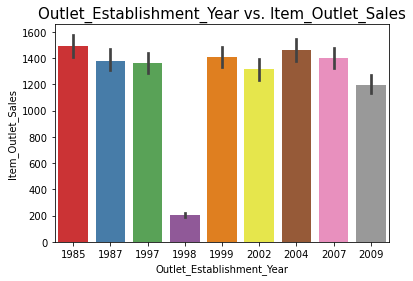

In [9]:
#Checking out the bar plot between Outlet_Establishment_Year vs Item_Outlet_Sales
outlet=sns.barplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=df, palette="Set1")
outlet.set_title("Outlet_Establishment_Year vs. Item_Outlet_Sales", fontsize=15)

We can see that the outlets are established from the years 1985 to 2009. Maximum sales had happened in the year 1985 whereas minumum sales had happened in the year 1998

Text(0.5, 1.0, 'Outlet_Identifier vs. Item_Outlet_Sales')

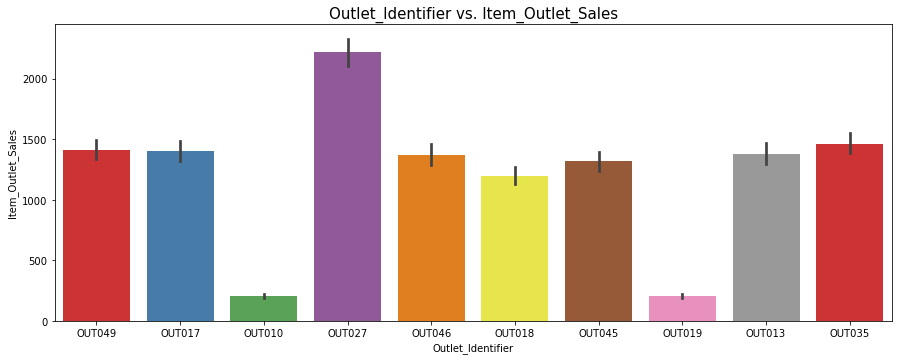

In [10]:
#Checking out the bar plot between Outlet_Identifier vs Item_Outlet_Sales
plt.figure(figsize = (15,12)) #Size of the figure
plt.subplot(211) #2 rows,1 column and 1 means we wish to place the plot in left column
OI=sns.barplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=df, palette="Set1")
OI.set_title("Outlet_Identifier vs. Item_Outlet_Sales", fontsize=15)

This graph explains us about the item outlet sales happened in various kinds of outlets. Maximum sales had happened in OUT027 whereas minimum sales had happened in both OUT010 and OUT019 respectively.

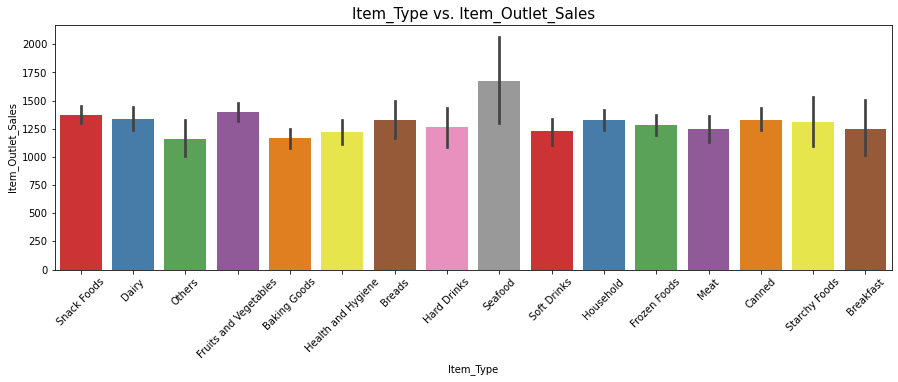

In [11]:
#Checking out the bar plot between Item_Type vs Item_Outlet_Sales
plt.figure(figsize = (15,12)) #Size of the figure
plt.subplot(312) #3 rows,1 column and 2 is the index of subplot
item=sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=df, palette="Set1")
item.set_title("Item_Type vs. Item_Outlet_Sales", fontsize=15)
plt.setp(item.get_xticklabels(), rotation=45) 
#Getting the xlabel and Rotating it to 45degrees so that we can see what's written

#Adjusting the subplot parameters like width, height and position of top edge
plt.subplots_adjust(wspace = 0.1, hspace = 0.4,top = 1.2)

The graph explains about the items sold in each outlets. Maximum items that were sold are Seafood whereas Minimum items that were sold are: Baking Goods and Other items

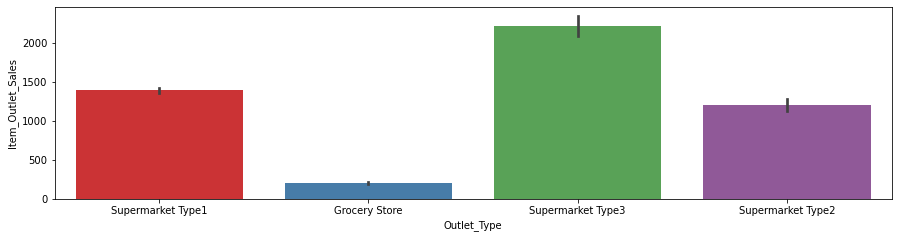

In [12]:
#Checking the sales happened according to type of outlets
plt.figure(figsize = (15,12)) #Size of the figure
plt.subplot(313) #3 rows,1 column and 3 is the index of subplot
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df, palette="Set1")

The graph explains about the items sold in Outlet type. Maximum sales were happened in Supermarket Type3 and minimum sales are happened in Grocery Store

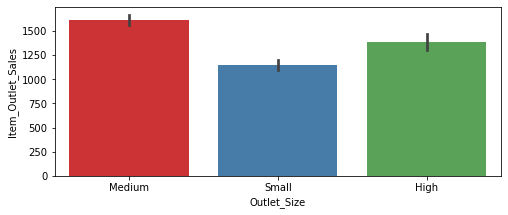

In [13]:
#Checking outlet size vs item outlet sales relationship
plt.figure(figsize = (8,7)) 

plt.subplot(311)
sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df, palette="Set1")
plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.4) #Adjusting the subplot

Maximum sales had happened in Medium size outlets whereas minimum sales had happened in small size outlets

# Scatter plot

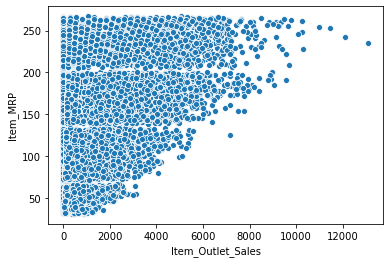

In [14]:
#Checking relationship of 2 columns using scatter plot
sns.scatterplot(x='Item_Outlet_Sales',y='Item_MRP',data=df)

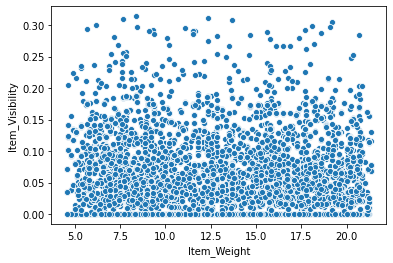

In [15]:
sns.scatterplot(x='Item_Weight',y='Item_Visibility',data=df)

As the relationship is non-linear, we can see the scatterplot data is not in linear shape

# Violin plot 

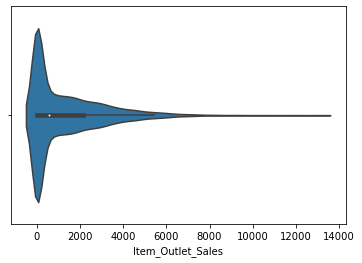

In [16]:
#Checking distribution of data using violinplot
sns.violinplot(x='Item_Outlet_Sales',data=df)

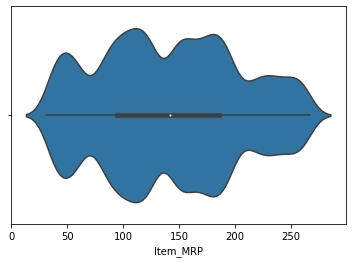

In [17]:
sns.violinplot(x='Item_MRP',data=df)

# Multivariate Analysis

In [18]:
df.describe()    #Statistical summary of the dataset

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,1308.865489
std,4.652502,0.051459,62.086938,8.371664,1699.791423
min,4.555000,0.000000,31.290000,1985.000000,0.000000
25%,8.710000,0.027036,94.012000,1987.000000,0.000000
50%,12.600000,0.054021,142.247000,1999.000000,559.272000
75%,16.750000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Observations:

1.There is not much difference between the mean and median values for all columns, except Item_Outlet_Sales where some of the values are 0

2.As there are missing values present in the dataset, the values are being affected and we need to handle it

3.There are outliers present , due to which the maximum and minimum values are having a large difference

In [19]:
#Checking correlation of the dataset
corr=df.corr()  #corr() function provides the correlation value of each column
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.015901,0.036236,0.000645,0.019447
Item_Visibility,-0.015901,1.000000,-0.006351,-0.083678,-0.075008
Item_MRP,0.036236,-0.006351,1.000000,0.000141,0.342781
Outlet_Establishment_Year,0.000645,-0.083678,0.000141,1.000000,-0.029489
Item_Outlet_Sales,0.019447,-0.075008,0.342781,-0.029489,1.000000


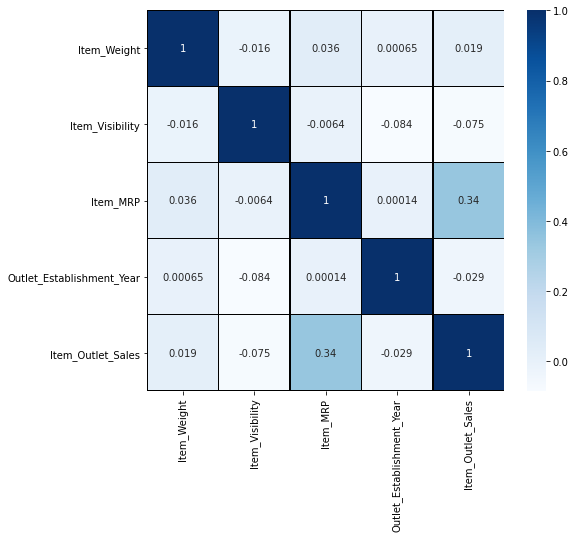

In [20]:
#Plotting heatmap to understand the visualization of correlation
plt.figure(figsize=(8,7))
sns.heatmap(corr,linewidth=0.5,linecolor='black',cmap='Blues',annot=True)
plt.show()

Observations:

1.All the columns have less correlation between each other

2.Highest positive correlation value column is Item_MRP with a value of 34% with target variable, Item_Outlet_Sales

3.Due to presence of missing data and outliers, the correlation is getting affected and we need to clear these problems

# Determining the years of operation of a store

As the datascientists at BigMart had collected the data from the year 2013, we need to check the years of operation of each store till 2013.

In [21]:
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']
df['Outlet_Years'].describe().T

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

We can see the operation of outlets ranging from 4 to 28 years, till 2013

In [22]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source,Item_Outlet_Sales,Outlet_Years
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test,0.0,14
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,test,0.0,6
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,test,0.0,15
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,test,0.0,6
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,test,0.0,28


# Handling the dataset

In [23]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
source                          0
Item_Outlet_Sales               0
Outlet_Years                    0
dtype: int64

We can replace NaN values by using replace function from numpy and SimpleImputer library

In [24]:
#Let's fill the Item_weight's missing values with the Mean of Item_weight data
import numpy as np
df['Item_Weight']=df['Item_Weight'].replace(np.NaN,df['Item_Weight'].mean())

In [25]:
#Let's fill the outlet_size with the most frequent data using SimpleImputer
from sklearn.impute import SimpleImputer
SI = SimpleImputer(strategy='most_frequent')
df['Outlet_Size']=SI.fit_transform(df['Outlet_Size'].values.reshape(-1,1)) #reshape is just to neglect any error value
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source,Item_Outlet_Sales,Outlet_Years
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test,0.0000,14
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,test,0.0000,6
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,test,0.0000,15
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,test,0.0000,6
4,FDY38,12.792854,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,test,0.0000,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDF22,6.865000,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,train,2778.3834,26
14200,FDS36,8.380000,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,train,549.2850,11
14201,NCJ29,10.600000,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,train,1193.1136,9
14202,FDN46,7.210000,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,train,1845.5976,4


In [26]:
#Checking NaN data after filling up
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
source                       0
Item_Outlet_Sales            0
Outlet_Years                 0
dtype: int64

There are no missing data after we handled them

# Converting Categorical data

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  source                     14204 non-null  object 
 12  Item_Outlet_Sales          14204 non-null  float64
 13  Outlet_Years               14204 non-null  int

There are 8 columns present in the dataset having categorical data and we need to convert them into numerical data. It can be done by using LabelEncoder

In [28]:
#Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
col = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','source','Outlet_Establishment_Year'
       ,'Outlet_Location_Type','Outlet_Size','Outlet_Type']   #Columns to be converted
for i in col:
    df[i] = le.fit_transform(df[i])  

In [29]:
df.head()   #Checking the dataset after conversion

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source,Item_Outlet_Sales,Outlet_Years
0,1114,20.750000,1,0.007565,13,107.8622,9,4,1,0,1,0,0.0,14
1,1078,8.300000,4,0.038428,4,87.3198,2,7,1,1,1,0,0.0,6
2,1420,14.600000,1,0.099575,11,241.7538,0,3,1,2,0,0,0.0,15
3,817,7.315000,1,0.015388,13,155.0340,2,7,1,1,1,0,0.0,6
4,1197,12.792854,2,0.118599,4,234.2300,5,0,1,2,3,0,0.0,28


In [30]:
df.dtypes   #Checking the datatypes after conversion

Item_Identifier                int32
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
source                         int32
Item_Outlet_Sales            float64
Outlet_Years                   int64
dtype: object

All the columns are in numeric datatypes after conversion and we can proceed further with the analysis

# Correlation after conversion

In [31]:
#Checking the correlation after conversion
corr=df.corr()
corr

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source,Item_Outlet_Sales,Outlet_Years
Item_Identifier,1.000000,0.047101,-0.096220,-0.040775,-0.012048,0.010743,-0.001089,-0.003173,0.002581,-0.002473,-0.004532,-0.001305,0.000906,0.002954
Item_Weight,0.047101,1.000000,-0.027387,-0.013641,0.028637,0.033002,0.003274,0.000503,0.001580,-0.002104,0.001699,0.015526,0.016425,-0.000462
Item_Fat_Content,-0.096220,-0.027387,1.000000,0.033864,-0.121140,-0.006195,-0.001733,-0.002541,-0.007084,-0.002518,-0.002380,0.000442,0.006195,0.004135
Item_Visibility,-0.040775,-0.013641,0.033864,1.000000,-0.035646,-0.006351,-0.106181,-0.091511,0.064836,-0.017362,-0.165726,0.004267,-0.075008,0.083678
Item_Type,-0.012048,0.028637,-0.121140,-0.035646,1.000000,0.043948,0.001126,0.003295,-0.002608,0.002083,0.004305,-0.000782,0.009769,-0.003061
Item_MRP,0.010743,0.033002,-0.006195,-0.006351,0.043948,1.000000,-0.000555,0.000302,-0.001018,0.000838,0.000136,-0.000241,0.342781,-0.000141
Outlet_Identifier,-0.001089,0.003274,-0.001733,-0.106181,0.001126,-0.000555,1.000000,-0.030948,0.504580,-0.716151,0.099899,-0.000083,0.097733,-0.079047
Outlet_Establishment_Year,-0.003173,0.000503,-0.002541,-0.091511,0.003295,0.000302,-0.030948,1.000000,0.070796,0.041889,-0.040255,0.000186,-0.015260,-0.970787
Outlet_Size,0.002581,0.001580,-0.007084,0.064836,-0.002608,-0.001018,0.504580,0.070796,1.000000,-0.614300,-0.201505,-0.000072,-0.051962,-0.193392
Outlet_Location_Type,-0.002473,-0.002104,-0.002518,-0.017362,0.002083,0.000838,-0.716151,0.041889,-0.614300,1.000000,0.467251,0.000023,0.053848,0.089328


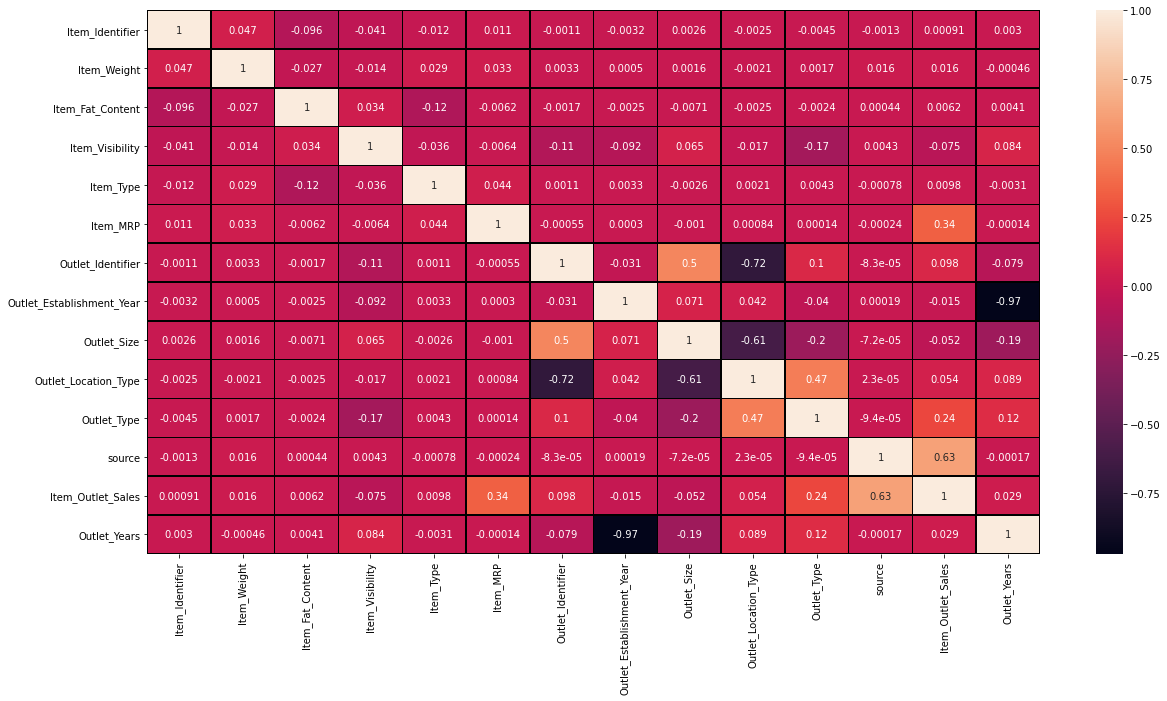

In [32]:
#Plotting heatmap to understand the visualization of correlation
plt.figure(figsize=(20,10))
sns.heatmap(corr,linewidth=0.5,linecolor='black',annot=True)
plt.show()

Observations:

1.There are mostly positive correlations present

2.Highest positive correlation is with source column and target variable, with a value of 63%

3.Outlet_Years has the highest negative correlation with Outlet_Establishment_Year with a value of -97%

4.Positive correlated columns have high impact with target variable, whereas negatively correlated columns have less or zero impact with the target variable.

# Checking skewness

In [33]:
df.skew()

Item_Identifier             -0.004897
Item_Weight                  0.111314
Item_Fat_Content             0.996640
Item_Visibility              1.195175
Item_Type                    0.099574
Item_MRP                     0.130728
Outlet_Identifier           -0.059994
Outlet_Establishment_Year    0.034412
Outlet_Size                 -0.087077
Outlet_Location_Type        -0.209053
Outlet_Type                  0.927344
source                      -0.408471
Item_Outlet_Sales            1.544684
Outlet_Years                 0.396465
dtype: float64

Skewness is present in columns like Item_Fat_Content, Item_Visibility, Outlet_Type and Item_Outlet_Sales

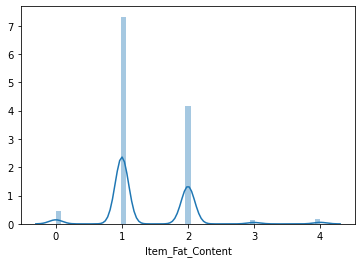

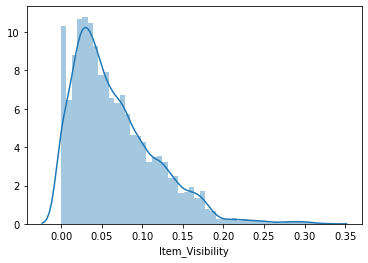

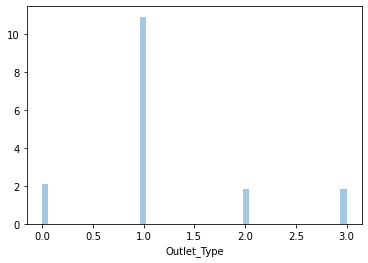

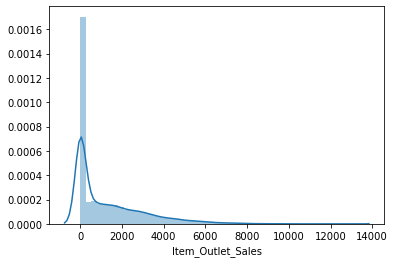

In [34]:
#Checking normal distribution for the skewness columns
skewcol= ['Item_Fat_Content','Item_Visibility','Outlet_Type','Item_Outlet_Sales'] 
for i in skewcol:
    sns.distplot(df[i])
    plt.show()

From the graphs of above columns, we can see that the data is not normally distributed and it is due to the presence of outliers and we need to handle it

# Checking outliers

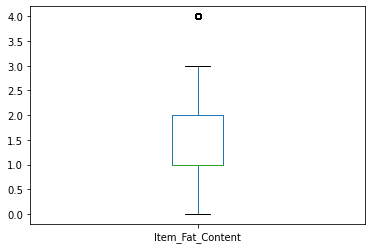

In [35]:
#Plotting boxplot for checking outliers
df['Item_Fat_Content'].plot.box()

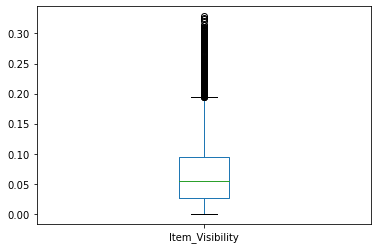

In [36]:
df['Item_Visibility'].plot.box()

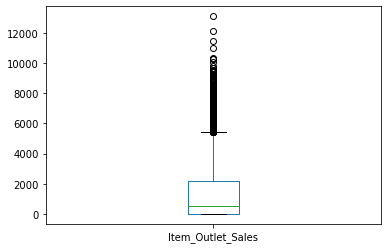

In [37]:
df['Item_Outlet_Sales'].plot.box()

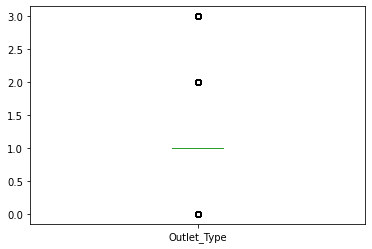

In [38]:
df['Outlet_Type'].plot.box()

As there are outliers in the dataset, we can handle them by using z-score

# Handling outliers using z-score

In [39]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))   #converting all values into absolute values
threshold=3    #setting up a threshold
np.where(z>3)

(array([    1,    46,    76,    78,    89,   103,   138,   242,   333,
          369,   385,   474,   499,   543,   595,   637,   739,   783,
          797,   815,   858,   871,   985,   996,  1025,  1037,  1046,
         1105,  1143,  1191,  1256,  1256,  1270,  1284,  1314,  1321,
         1411,  1422,  1437,  1516,  1539,  1616,  1710,  1757,  1780,
         1812,  1823,  1853,  1857,  1915,  1919,  1927,  2019,  2070,
         2167,  2179,  2230,  2271,  2275,  2365,  2365,  2380,  2393,
         2504,  2516,  2561,  2595,  2605,  2609,  2625,  2628,  2677,
         2779,  2798,  2836,  2843,  2866,  2915,  2926,  3039,  3077,
         3097,  3267,  3294,  3313,  3316,  3357,  3362,  3378,  3461,
         3502,  3565,  3622,  3638,  3679,  3744,  3778,  3783,  3950,
         3970,  4021,  4052,  4133,  4146,  4147,  4148,  4159,  4208,
         4232,  4255,  4328,  4330,  4334,  4340,  4352,  4365,  4421,
         4478,  4542,  4575,  4616,  4616,  4689,  4692,  4726,  4801,
      

In [40]:
#Removing outliers
df_new=df[(z<3).all(axis=1)]
df_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source,Item_Outlet_Sales,Outlet_Years
0,1114,20.750000,1,0.007565,13,107.8622,9,4,1,0,1,0,0.0000,14
2,1420,14.600000,1,0.099575,11,241.7538,0,3,1,2,0,0,0.0000,15
3,817,7.315000,1,0.015388,13,155.0340,2,7,1,1,1,0,0.0000,6
4,1197,12.792854,2,0.118599,4,234.2300,5,0,1,2,3,0,0.0000,28
5,465,9.800000,2,0.063817,6,117.1492,8,2,2,0,1,0,0.0000,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,370,6.865000,1,0.056783,13,214.5218,1,1,0,2,1,1,2778.3834,26
14200,897,8.380000,2,0.046982,0,108.1570,7,5,1,1,1,1,549.2850,11
14201,1357,10.600000,1,0.035186,8,85.1224,6,6,2,1,1,1,1193.1136,9
14202,681,7.210000,2,0.145221,13,103.1332,3,8,1,2,2,1,1845.5976,4


In [41]:
df.shape   #Original dataset dimensions

(14204, 14)

In [42]:
df_new.shape   #New dataset dimensions

(13637, 14)

Nearly 500+ rows had outliers and it has been removed by using z-score method

# Percentage loss of data after removing outliers

In [43]:
percentage_loss=((567)/14204)*100   #567 = 14204-13637
print(percentage_loss)

3.991833286398198


Nearly 4% of the data has been removed which is not a big loss

# Removing skewness using log transform

As the target variable also had skewness, we consider the entire dataset and removing the skewness using log transform

In [44]:
for col in df_new.columns:
    if df_new.skew().loc[col]>0.55:
        df_new[col]=np.log1p(df_new[col])

In [45]:
df_new.skew()   #Checking after removing skewness

Item_Identifier             -0.007206
Item_Weight                  0.107797
Item_Fat_Content             0.284306
Item_Visibility              0.710667
Item_Type                    0.091851
Item_MRP                     0.144519
Outlet_Identifier           -0.067703
Outlet_Establishment_Year    0.012625
Outlet_Size                 -0.087967
Outlet_Location_Type        -0.202324
Outlet_Type                 -0.237767
source                      -0.385539
Item_Outlet_Sales           -0.268402
Outlet_Years                 0.423675
dtype: float64

# Preparing dataset for model training 

Splitting x(Independent variables) and y(Target variable/Dependent variables)

In [46]:
x=df_new.drop('Item_Outlet_Sales',axis=1)   #Independent variables
y=df_new['Item_Outlet_Sales']    #Dependent or Target Variable

In [47]:
#Checking x data
x.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source,Outlet_Years
0,1114,20.750000,1,0.007536,13,107.8622,9,4,1,0,0.693147,0,14
2,1420,14.600000,1,0.094924,11,241.7538,0,3,1,2,0.000000,0,15
3,817,7.315000,1,0.015271,13,155.0340,2,7,1,1,0.693147,0,6
4,1197,12.792854,2,0.112077,4,234.2300,5,0,1,2,1.386294,0,28
5,465,9.800000,2,0.061864,6,117.1492,8,2,2,0,0.693147,0,16


In [48]:
#Checking y data after splitting
y

0        0.000000
2        0.000000
3        0.000000
4        0.000000
5        0.000000
           ...   
14199    7.929984
14200    6.310436
14201    7.085159
14202    7.521100
14203    6.642056
Name: Item_Outlet_Sales, Length: 13637, dtype: float64

# Scaling the model 

Sometimes model can be biased to higher values in dataset, so it is better to scale the dataset so that we can bring all the columns in common range. We can use StandardScaler here.

In [49]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 7.36059157e-01,  1.86539187e+00, -5.84964117e-01, ...,
        -1.02612632e-01, -1.21115474e+00, -1.20579793e-01],
       [ 1.41360894e+00,  4.22698286e-01, -5.84964117e-01, ...,
        -2.06803592e+00, -1.21115474e+00, -3.61439649e-04],
       [ 7.84373110e-02, -1.28624851e+00, -5.84964117e-01, ...,
        -1.02612632e-01, -1.21115474e+00, -1.08232662e+00],
       ...,
       [ 1.27411340e+00, -5.15639007e-01, -5.84964117e-01, ...,
        -1.02612632e-01,  8.25658330e-01, -7.21671560e-01],
       [-2.22695925e-01, -1.31087986e+00,  1.17950296e+00, ...,
         1.04708629e+00,  8.25658330e-01, -1.32276333e+00],
       [-1.61986557e+00,  4.69615150e-01, -5.84964117e-01, ...,
        -1.02612632e-01,  8.25658330e-01,  1.19856914e-01]])

# Building the model

In [50]:
#Importing required metrices and model for the dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [51]:
#Finding the best random state and accuracy
best_rstate=0
accuracy=0
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print('At random state',i,',the model performs well')
        print('Training r2_score is: ',r2_score(y_train,pred_train)*100)
        print('Testing r2_score is: ',r2_score(y_test,pred_test)*100)

At random state 24 ,the model performs well
Training r2_score is:  97.28516541337815
Testing r2_score is:  97.28900760150509
At random state 106 ,the model performs well
Training r2_score is:  97.28586632714563
Testing r2_score is:  97.28755353948492
At random state 109 ,the model performs well
Training r2_score is:  97.28693188935631
Testing r2_score is:  97.2855126076708
At random state 275 ,the model performs well
Training r2_score is:  97.28597597386532
Testing r2_score is:  97.28750761432924
At random state 279 ,the model performs well
Training r2_score is:  97.28641034763555
Testing r2_score is:  97.28744708959451
At random state 294 ,the model performs well
Training r2_score is:  97.28551982630272
Testing r2_score is:  97.28798393560024
At random state 441 ,the model performs well
Training r2_score is:  97.2857406142998
Testing r2_score is:  97.28846132767116
At random state 451 ,the model performs well
Training r2_score is:  97.28503584944754
Testing r2_score is:  97.2922998487

We can see that, at random state=451 it is giving the best training and testing r2_scores so that we can create our train_test_split with this random state

In [52]:
#Creating train_test_split using best random_state
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=451,test_size=.20)

# Finding the best model

In [53]:
#Importing the models we are going to use
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [54]:
LR=LinearRegression()
rfr=RandomForestRegressor()
svr=SVR()
dtr=DecisionTreeRegressor()

In [55]:
models= []
models.append(('Linear Regression',LR))
models.append(('Random Forest Regressor',rfr))
models.append(('Support Vector Regressor',svr))
models.append(('Decision Tree Regressor',dtr))

In [56]:
#Importing required metrics
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

In [57]:
#Finding the required metrices for all models together using a for loop
Model=[]
score=[]
cvs=[]
mse=[]
rmse=[]
for name,model in models:
    print('******************************',name,'***************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=r2_score(y_test,pre)
    print('accuracy_score: ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('cross_val_score: ',sc)
    cvs.append(sc*100)
    print('\n')
    MSE=mean_squared_error(y_test,pre)
    print('Mean Squared Error: ',MSE)
    mse.append(MSE)
    print('\n')
    RMSE=np.sqrt(mean_squared_error(y_test,pre))
    print('Root Mean Squared Error: ',RMSE)
    rmse.append(RMSE)
    print('\n\n')

****************************** Linear Regression ***************************


LinearRegression()


accuracy_score:  0.9729229984870641


cross_val_score:  0.33928875476483433


Mean Squared Error:  0.3629017612129725


Root Mean Squared Error:  0.6024132810728632



****************************** Random Forest Regressor ***************************


RandomForestRegressor()


accuracy_score:  0.9872391753835068


cross_val_score:  0.8509605850383007


Mean Squared Error:  0.17102801156334924


Root Mean Squared Error:  0.41355533071567246



****************************** Support Vector Regressor ***************************


SVR()


accuracy_score:  0.9865291895107113


cross_val_score:  0.4510595088352489


Mean Squared Error:  0.1805436561797116


Root Mean Squared Error:  0.42490429061108764



****************************** Decision Tree Regressor ***************************


DecisionTreeRegressor()


accuracy_score:  0.9757124992961447


cross_val_score:  0.7268903190436455


Me

In [58]:
#Finalizing the result
result=pd.DataFrame({'Model':Model, 'Accuracy_score': score,'Cross_val_score':cvs,
                     'Mean_squared_error':mse,'Root_Mean_Squared_error':rmse})
result

,Model,Accuracy_score,Cross_val_score,Mean_squared_error,Root_Mean_Squared_error
0,Linear Regression,97.292300,33.928875,0.362902,0.602413
1,Random Forest Regressor,98.723918,85.096059,0.171028,0.413555
2,Support Vector Regressor,98.652919,45.105951,0.180544,0.424904
3,Decision Tree Regressor,97.571250,72.689032,0.325515,0.570539


From the above results, we can say that Random Forest Regressor is performing well among all with an accuracy_score of 98.72 and cross_validation_score of 85.09. Now, we will perform hyperparameter tuning for improving the accuracy of the model

# Hyperparameter Tuning

A technique used to find out the best parameter for our model to improve the accuracy

In [59]:
#Creating parameter list to pass in GridSearchCV
parameters={"n_estimators":[10,20,30,50,100,150,200,400,500,1000]}

In [60]:
#Using GridSearchCV to run the parameters and checking final accuracy
from sklearn.model_selection import GridSearchCV
rfr=RandomForestRegressor()
clf=GridSearchCV(rfr,parameters,cv=5,scoring='r2')
clf.fit(x_train,y_train)
clf.best_estimator_  #Finding the best estimator
clf_pred=clf.best_estimator_.predict(x_test)  #Predicting value using best estimator
print('Final Accuracy: ',r2_score(y_test,clf_pred)*100)

Final Accuracy:  98.74117138267131


After hyperparameter tuning technique, we can see that the accuracy has been increased from 98.72 to 98.74 which is a good increase. We can conclude that this technique is effective in increasing a model accuracy

In [61]:
clf.best_params_ #Checking the best parameter used

{'n_estimators': 400}

The best parameter used for the increase in the accuracy is 400

# Conclusion

-> The given dataset for BigMart is a very good dataset for predicting the Item_Outlet_Sales value. 

-> The best algorithm for this dataset is the Random Forest Regressor Algorithm which gave an accuracy of 98.72 and                cross_val_score of 85.09.

-> In order to improve the accuracy, we used hyperparameter tuning technique and from that we increased the accuracy of the        model from 98.72 to 98.74.

-> By achieving a good accuracy and cross validation score, our model is ready for deployment.

# Serialization

In [62]:
import joblib
joblib.dump(rfr,'BigMartSalesProject.obj')

['BigMartSalesProject.obj']